In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Rename the 'Mean F1 Score', 'Mean Rouge1', etc. columns for consistency
ada_df = ada_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

curie_df = curie_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

davinci_df = davinci_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

turbo_df = turbo_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


In [8]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('combined_Prompt.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Group the DataFrame by 'Generated_Texts' and 'Model'
grouped = df.groupby(['Generated_Texts', 'Model'])

# Calculate the mean for each metric within each group
mean_metrics = grouped[['Bleu', 'F1_Score', 'RougeL', 'Length', 'Vec2']].mean().reset_index()

# Save the results to a single CSV file with columns for each metric
mean_metrics.to_csv('mean_metrics_results.csv', index=False)

# Print the result
print(mean_metrics)


   Generated_Texts    Model      Bleu  F1_Score    RougeL  Length      Vec2
0            Text1      ada  0.031350  0.097696  0.208685  669.80  0.926764
1            Text1    curie  0.108675  0.175339  0.311530  669.80  0.965413
2            Text1  davinci  0.165930  0.251802  0.401391  669.80  0.767971
3            Text1    turbo  0.135565  0.238643  0.372880  669.80  0.977644
4            Text2      ada  0.028745  0.091025  0.191006  345.30  0.888882
5            Text2    curie  0.095785  0.160806  0.294073  677.10  0.956595
6            Text2  davinci  0.048555  0.145630  0.260569  580.10  0.678914
7            Text2    turbo  0.161190  0.270517  0.405997  938.85  0.962758
8            Text3      ada  0.013685  0.056894  0.168481  344.05  0.911130
9            Text3    curie  0.072580  0.138900  0.257602  673.60  0.934387
10           Text3  davinci  0.162165  0.273336  0.397843  232.30  0.763000
11           Text3    turbo  0.167090  0.277118  0.407193  629.40  0.964398


In [2]:
import pandas as pd

# Your original data
data = pd.read_csv('bleu2_results.csv')

# Pivot the data to the desired format
pivoted_data = data.pivot(index='Model', columns='Generated_Texts', values='Bleu')

# If you want to rename the columns as specified
pivoted_data.columns = ['Text1', 'Text2', 'Text3']

# Reset the index
pivoted_data.reset_index(inplace=True)

# Save the pivoted data to a CSV file
pivoted_data.to_csv('bleu.csv', index=False)

print("Data has been saved to 'pivoted_data.csv'")


Data has been saved to 'pivoted_data.csv'


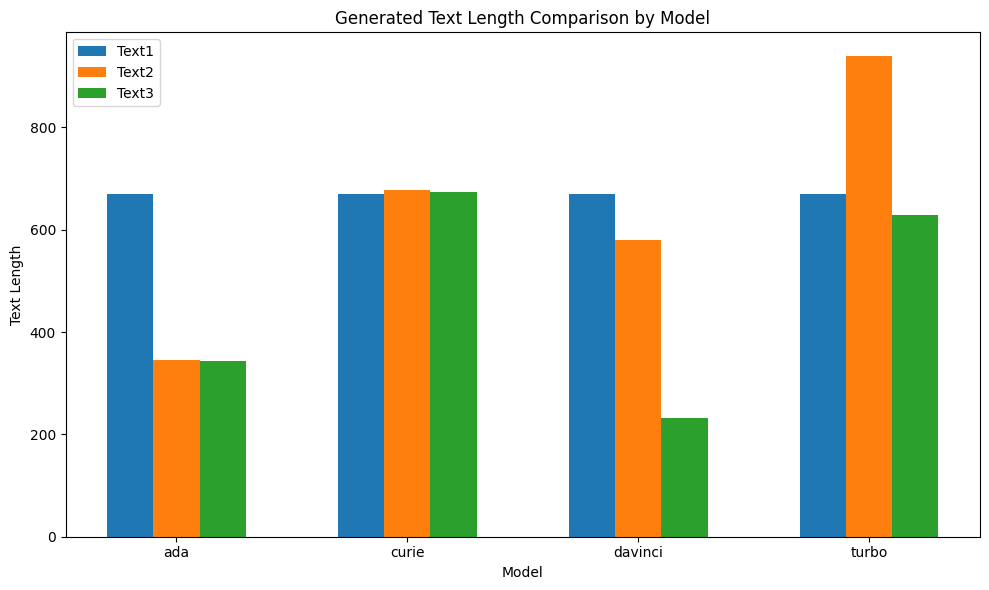

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Text1': [669.80, 669.80, 669.80, 669.80],
    'Text2': [345.30, 677.10, 580.10, 938.85],
    'Text3': [344.05, 673.60, 232.30, 629.40]
}


df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated Text Length Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


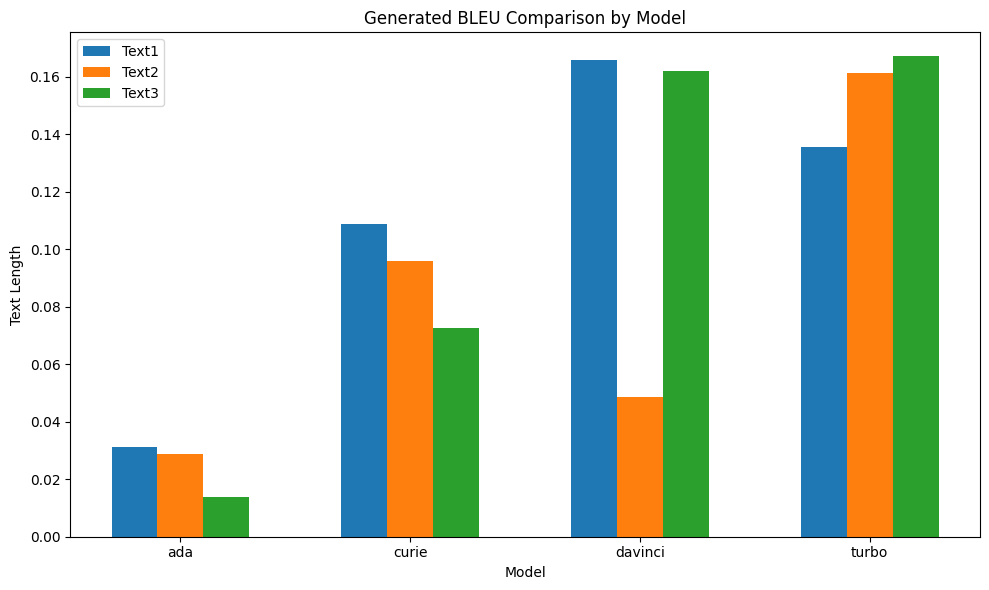

In [7]:
#1-	Comparison of Prompts by Model and Text Length Metric

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = pd.read_csv('p3_bleu.csv')

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated BLEU Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


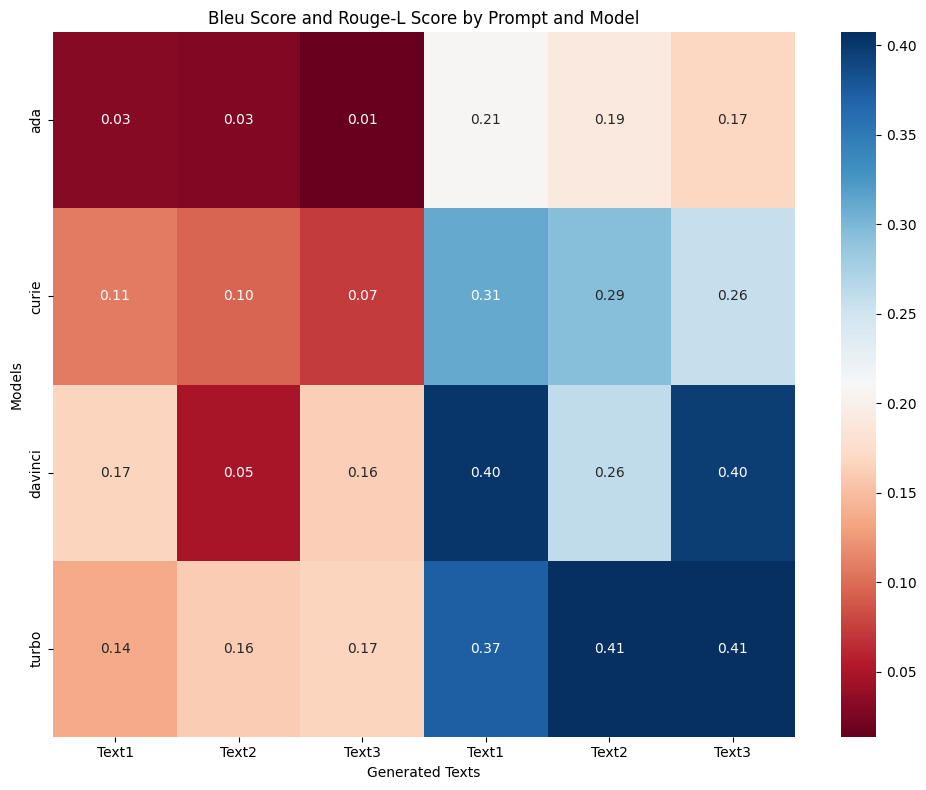

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('mean.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Model', columns='Generated_Texts', values=['Bleu', 'RougeL'])

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', xticklabels=heatmap_data.columns.get_level_values(1), yticklabels=heatmap_data.index)
plt.xlabel('Generated Texts')  # Updated x-axis label
plt.ylabel('Models')
plt.title('Bleu Score and Rouge-L Score by Prompt and Model')
plt.tight_layout()

# Show the plot
plt.show()
